In [251]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [252]:
survival_by_type= pd.read_csv('Resources/survival_donor_type_df.csv')
survival_by_age= pd.read_csv('Resources/survival_age_df.csv')
survival_by_diagnoses= pd.read_csv('Resources/survival_diagnose_df.csv')
cPRA_scores= pd.read_csv('Resources/clean_cPRA.csv').drop(columns=['Med. Center', 'Unnamed: 0'])

med_centers= pd.read_csv('Resources/latLong.csv').drop(columns=['All Centers Hospital Name', 'Address', 'Unnamed: 5',
                                                      'lat/long', 'Hospital Name'])
# cost_by_type= pd.read_csv('Resources/type-by-money.csv')


# med_centers.head()
# survival_by_age.head()
# cPRA_scores.head()
# survival_by_type.head()
# survival_by_diagnoses.head()


# survival_by_type.Organ.unique()
# print(len(cost_by_type))
# print(len(survival_by_diagnoses))
# print(len(survival_by_age))

In [253]:
survival_df= pd.merge(survival_by_age, survival_by_diagnoses, on='Organ', how='inner')
survival_df
joined_df= survival_df.join(cPRA_scores)
# joined_df

filtered_df= joined_df.drop(columns= ['_id_x', 'Region_x','_id_y', 'Region_y'])
filtered_df
filtered_df['Years_Post_Transplant_x'] = filtered_df['Years_Post_Transplant_x'].str.replace(r'Year', '').astype(float)
filtered_df['Years_Post_Transplant_y'] = filtered_df['Years_Post_Transplant_y'].str.replace(r'Year', '').astype(float)
# filtered_df.Organ.unique()

main_df= filtered_df.copy()
main_df=main_df.dropna()
main_df.head()

,Organ,Recipient_Age,Years_Post_Transplant_x,Number_Functioning_or_Alive_x,Survival_Rate_x,Recipient_Diagnose_Category,Years_Post_Transplant_y,Number_Functioning_or_Alive_y,Survival_Rate_y,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart
0,Heart,< 1 Year,1.0,405,87.4,Valvular Heart Disease,1.0,110,91.0,0,9,0.0,0.0,0.0,0.0
1,Heart,< 1 Year,1.0,405,87.4,Retransplant/Graft Failure,5.0,224,68.3,20-79,1,0.0,0.0,0.0,0.0
2,Heart,< 1 Year,1.0,405,87.4,Cardiomyopathy,1.0,5035,92.0,98-100,5,0.0,0.0,0.0,0.0
3,Heart,< 1 Year,1.0,405,87.4,Cardiomyopathy,3.0,4183,87.1,0,622,0.0,3.0,7.0,0.0
4,Heart,< 1 Year,1.0,405,87.4,Valvular Heart Disease,3.0,108,88.7,1-19,46,0.0,0.0,0.0,0.0


In [301]:
main_df['Survival Rate'] =  main_df[['Survival_Rate_x', 'Survival_Rate_y']].mean(axis=1)
main_df['Years Post Transplant'] = main_df[['Years_Post_Transplant_y', 'Years_Post_Transplant_x']].mean(axis=1)
main_df['Number Functioning or Alive'] = main_df["Number_Functioning_or_Alive_y"] + main_df["Number_Functioning_or_Alive_x"]

final_df= main_df.drop(columns=['Survival_Rate_y', 'Survival_Rate_x', 'Number_Functioning_or_Alive_x', 
                          'Number_Functioning_or_Alive_y','Years_Post_Transplant_x', 'Years_Post_Transplant_y'])
# final_df_copy=final_df.copy()

final_df

,Organ,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Survival Rate,Years Post Transplant,Number Functioning or Alive
0,Heart,< 1 Year,Valvular Heart Disease,0,9,0.0,0.0,0.0,0.0,89.20,1.0,515
1,Heart,< 1 Year,Retransplant/Graft Failure,20-79,1,0.0,0.0,0.0,0.0,77.85,3.0,629
2,Heart,< 1 Year,Cardiomyopathy,98-100,5,0.0,0.0,0.0,0.0,89.70,1.0,5440
3,Heart,< 1 Year,Cardiomyopathy,0,622,0.0,3.0,7.0,0.0,87.25,2.0,4588
4,Heart,< 1 Year,Valvular Heart Disease,1-19,46,0.0,0.0,0.0,0.0,88.05,2.0,513
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Liver,6-10 Years,Non-Cholestatic Cirrhosis,0,19,0.0,0.0,0.0,0.0,87.80,2.0,7850
1147,Liver,6-10 Years,Other,1-19,10,0.0,0.0,0.0,0.0,84.00,2.0,747
1148,Liver,6-10 Years,Acute Hepatic Necrosis,20-79,10,0.0,0.0,0.0,0.0,85.80,3.0,1125
1149,Liver,6-10 Years,Cystic Fibrosis,80-97,1,0.0,0.0,0.0,0.0,90.80,1.0,321


In [302]:

# joined_df.groupby(by= ['Survival_Rate'], dropna= False)

X= final_df.drop(columns='Organ')
y= pd.DataFrame(final_df['Organ'].values.reshape(-1,1))
 
y
# X.head()

,0
0,Heart
1,Heart
2,Heart
3,Heart
4,Heart
...,...
1146,Liver
1147,Liver
1148,Liver
1149,Liver


In [303]:
pd.value_counts(y[0], normalize = True)

Kidney               0.492615
Heart                0.354474
Kidney / Pancreas    0.078193
Liver                0.074718
Name: 0, dtype: float64

In [304]:
print(X.shape, y.shape)
# X.dtypes

(1151, 11) (1151, 1)


In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_test.shape, y_test.shape)
y_train.head()

(380, 11) (380, 1)


,0
1092,Liver
249,Heart
822,Kidney
534,Kidney
71,Heart


In [306]:
y_pred = ['functional'] * len(X_test)
y_pred = pd.DataFrame(data = y_pred,
                      index = X_test.index.values,
                      columns = [0])
y_pred.head()

,0
174,functional
752,functional
467,functional
240,functional
667,functional


In [307]:
# Logistic Regression classifier and score

X_train_numerical = X_train.select_dtypes(
                         include = np.number).copy()

X_train_numerical_indices = X_train_numerical.index.values
y_train_numerical = y_train[y_train.index. \
                                    isin(X_train_numerical_indices)]


In [308]:
# Decision Tree classifier and score

clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, 
                            X_train_numerical, y_train_numerical,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished


array([0.80155642, 0.81712062, 0.79377432])

In [309]:
clf.fit(X_train_numerical, y_train_numerical)

X_test_numerical = X_test.select_dtypes(include = np.number).copy()



y_pred = clf.predict(X_test_numerical)
y_pred = pd.DataFrame(data = y_pred, 
                      index = X_test_numerical.index.values,
                      columns = ['Organ'])

# y_pred
# X_test_numerical


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X_train_numerical, y_train_numerical, 
                                                    test_size = 0.33, random_state = 42)
print(X_train.shape, y_train.shape)

(516, 7) (516, 1)


In [311]:
# Encode columns that have < 50 unique values, add the numerical columns to df.
# Ran a Decision Tree classifier again and increased scores

X_selected = X_train.loc[:, X_train.nunique().sort_values()\
                             < 50]
cat_cols = list(X_selected.select_dtypes(['object']).columns.values)
X_categorical = X_selected[cat_cols].apply(lambda x: x.astype('category').cat.codes)
X_train_selected = X_train_numerical.join(X_categorical)
clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, 
                            X_train_selected, y_train_numerical,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
cv_score
# print(X_train_selected)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished


array([0.81712062, 0.79766537, 0.78599222])

In [348]:
X_train_array= np.array(X_train_numerical)
y_train_array= np.array(y_train_numerical)

y2= pd.get_dummies(y_train_numerical).values.astype(float)
X2= pd.get_dummies(X_train_selected).values


In [269]:

# y_train= np.delete(axis=1)
# y_test.drop(axis=1)
# print(X_train.shape, y_train.shape)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size = 0.33, random_state = 42)
print(X_train.shape, y_train.shape)
y_test

(516, 7) (516, 4)


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [350]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))
# y_train_array

print(X_train.shape, y_train.shape)
# y_train.dtypes.astype(int)

0.9324579583908325
0.4940953049913316
(516, 7) (516, 4)


In [351]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [358]:
y_pred = rfr.predict(X_test)
# y_pred= pd.DataFrame(y_pred)

y_pred

array([[0.  , 1.  , 0.  , 0.  ],
       [0.91, 0.03, 0.06, 0.  ],
       [0.24, 0.61, 0.  , 0.15],
       ...,
       [0.  , 1.  , 0.  , 0.  ],
       [0.28, 0.53, 0.19, 0.  ],
       [0.98, 0.02, 0.  , 0.  ]])

In [368]:

print(utils.multiclass.type_of_target(y_pred))
print(utils.multiclass.type_of_target(y_test))


continuous-multioutput
multilabel-indicator


In [369]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

In [315]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [15, 25, 35],
    'max_depth': [6, 10, 20, 30]
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=10)
gridsearch.fit(X_train, y_train)

# The variable ‘cv’ gives the number of cross-validation folds that grid search should use. 
# cv = 3 will split our data into 3 equal parts.
# Then use two of them for training the RandomForest classifier, and test with the remaining data. 
# Keeps going until all combinations are exhausted.

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=6, n_estimators=15 ....................................
[CV]  max_depth=6, n_estimators=15, score=(train=0.840, test=0.762), total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=6, n_estimators=15, score=(train=0.834, test=0.785), total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV]  max_depth=6, n_estimators=15, score=(train=0.840, test=0.727), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=(train=0.855, test=0.767), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=6, n_estimators=25, score=(train=0.837, test=0.767), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=(train=0.846, test=0.762), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=6, n_estimators=35, score=(train=0.846, test=0.779), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................
[CV]  max_depth=6, n_estimators=35, score=(train=0.840, test=0.744), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=6, n_estimators=35, score=(train=0.843, test=0.727), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV]  max_depth=10, n_estimators=15, score=(train=0.968, test=0.756), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV]  max_depth=10, n_estimators=15, score=(train=0.968, test=0.779), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=10, n_estimators=15, score=(train=0.956, test=0.738), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.980, test=0.797), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.985, test=0.791), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.968, test=0.767), total=   0.1s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.968, test=0.779), total=   0.1s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.974, test=0.773), total=   0.2s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.977, test=0.767), 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30],
                         'n_estimators': [15, 25, 35]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [316]:
gridsearch_summary= pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')
gridsearch_summary.head()

# Top row of summary shows the param_grid options that gave the best score on test data. 
# This is shown in the mean_test_score column where our score is 0.87. Same as the Decision Tree classifier.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,0.120268,0.021325,0.022853,0.004104,20,35,"{'max_depth': 20, 'n_estimators': 35}",0.796512,0.767442,0.796512,0.786822,0.013704,1,0.997093,0.997093,0.997093,0.997093,1.110223e-16
4,0.063090,0.008922,0.012493,0.000774,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.796512,0.790698,0.767442,0.784884,0.012560,2,0.979651,0.985465,0.968023,0.977713,7.251274e-03
10,0.103883,0.032962,0.020134,0.007241,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.790698,0.779070,0.784884,0.784884,0.004747,2,0.994186,1.000000,0.997093,0.997093,2.373537e-03
7,0.069460,0.007973,0.015316,0.002151,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.796512,0.767442,0.767442,0.777132,0.013704,4,0.994186,0.997093,0.997093,0.996124,1.370362e-03
11,0.124577,0.033945,0.018024,0.003600,30,35,"{'max_depth': 30, 'n_estimators': 35}",0.796512,0.779070,0.755814,0.777132,0.016671,4,1.000000,1.000000,0.994186,0.998062,2.740724e-03


In [317]:
RandomForestClassifier().get_params().keys()
gridsearch_df= pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')

gridsearch_df= gridsearch_df.copy()
gridsearch_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,0.120268,0.021325,0.022853,0.004104,20,35,"{'max_depth': 20, 'n_estimators': 35}",0.796512,0.767442,0.796512,0.786822,0.013704,1,0.997093,0.997093,0.997093,0.997093,1.110223e-16
4,0.063090,0.008922,0.012493,0.000774,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.796512,0.790698,0.767442,0.784884,0.012560,2,0.979651,0.985465,0.968023,0.977713,7.251274e-03
10,0.103883,0.032962,0.020134,0.007241,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.790698,0.779070,0.784884,0.784884,0.004747,2,0.994186,1.000000,0.997093,0.997093,2.373537e-03
7,0.069460,0.007973,0.015316,0.002151,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.796512,0.767442,0.767442,0.777132,0.013704,4,0.994186,0.997093,0.997093,0.996124,1.370362e-03
11,0.124577,0.033945,0.018024,0.003600,30,35,"{'max_depth': 30, 'n_estimators': 35}",0.796512,0.779070,0.755814,0.777132,0.016671,4,1.000000,1.000000,0.994186,0.998062,2.740724e-03


In [320]:
import pickle

file_name='final_model.sav'
input_format_file='input_columns.sav'
# input_scaler_file='input_scaler.sav'
pickle.dump(rfr, open(file_name, 'wb'))
pickle.dump(X_train.columns, open(input_format_file, 'wb'))
# pickle.dump(scaler, open(input_scaler_file, 'wb'))

sklearn.ensemble._forest.RandomForestRegressor

<AxesSubplot:xlabel='Average Split Test Score', ylabel='Average Split Train Score'>

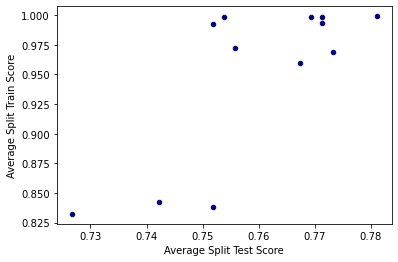

In [295]:
# gridsearch_array= np.array(gridsearch_df)

# plt.scatter(y=gridsearch_array(pd.to_numeric(gridsearch_array['mean_test_score'], 
#                         errors='coerce')), x=gridsearch_array(gridsearch_array['mean_train_score'], 
#                         c=gridsearch_array['std_test_score'], cmap='Blues'))

gridsearch_df['Average Split Test Score'] = gridsearch_df[["split0_test_score", "split1_test_score", "split2_test_score"]].mean(axis=1)
gridsearch_df['Average Split Train Score'] = gridsearch_df[["split0_train_score", "split1_train_score", "split2_train_score"]].mean(axis=1)


gridsearch_df.head()


gridsearch_df.plot.scatter(x='Average Split Test Score',
                      y='Average Split Train Score',
                      c='DarkBlue')

In [117]:
type(RandomForestClassifier)

abc.ABCMeta

In [321]:
# for column in gridsearch_df: 
#     if gridsearch_df[column] < 100: 
#         print(f'{column} options: {gridsearch_df[column].unique()}')
#         print('='*20)

## LinearRegression model


In [57]:
# from sklearn.linear_model import LinearRegression

# X_train_numerical.columns= range(X_train_numerical.shape[1])
# y_train_numerical.columns= 
# # X_train_numerical
# model = LinearRegression()
# # model.fit(X_train_numerical, y_train_numerical).astype(float)
# # # X_train_numerical


In [56]:
# # Printing testing and training score for LinearRegression model and realized it's not very linear data.
# # 
# training_score = model.score(X_train_numerical, y_train_numerical)
# testing_score = model.score(X_test_scaled, y_test_scaled)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

Training Data Score: 2.589 %
Testing Data Score: 2.512 %


Slope:  [[ 0.35163399]
 [ 0.4875817 ]
 [ 0.08888889]
 [-0.92810458]]
Intercept:  [-5.55111512e-17  6.10622664e-16  1.94289029e-16  1.00000000e+00]
Root mean Squared Error (MSE): 0.14747247235094033
R-squared (R2 ): 0.025579336603709202


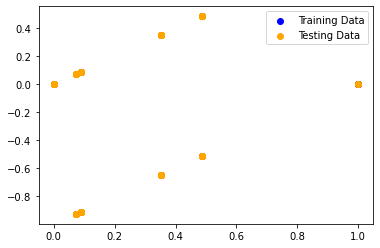

In [195]:
# Calculating the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use model to make predictions
y_predicted = model.predict(X_test_scaled)

# # Score predictions with mse and r2
rmse = mean_squared_error(y_test_scaled, y_predicted)
r2 = r2_score(y_test_scaled, y_predicted)

print(f"Slope: ", model.coef_)
print('Intercept: ', model.intercept_)
print(f"Root mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2 ): {r2}")
# 
train_predict= plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
test_predict= plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# plt.scatter(X_test_scaled, y_test_scaled, s=5)
# plt.plot(y_predicted, color='r')
plt.show()


In [196]:
model.score(X_test_scaled, y_test_scaled)

0.025579336603709202